In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [18]:
X, y = mnist['data'], mnist['target']

In [19]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

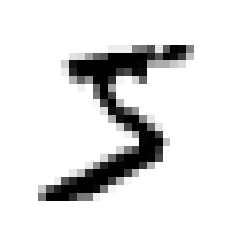

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")

In [21]:
y[0]

'5'

In [22]:
y = y.astype(np.uint8)

In [23]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


### Training a binary classifier

In [24]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [28]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [29]:
never_5_classifier = Never5Classifier()
cross_val_score(never_5_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Confusion Metrics

In [30]:
from sklearn.model_selection import cross_val_predict
    
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds, = precision_recall_curve(y_train_5, y_scores)

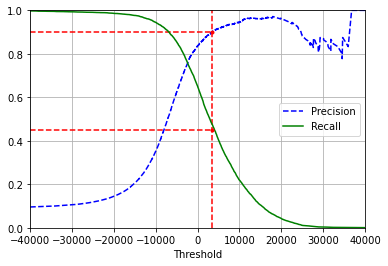

In [114]:
def plot_precision_recall_curve_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.vlines(3370, 0, 1, colors="r", linestyle="--")
    plt.hlines(.9, -40000, 3370, colors="r", linestyle="--")
    plt.hlines(.45, -40000, 3370, colors="r", linestyle="--")
    plt.plot(3370, .45, marker=".", color="r")
    plt.plot(3370, .9, marker=".", color="r")
    plt.xlim((-40000, 40000))
    plt.ylim((0, 1))
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    plt.grid()
    
plot_precision_recall_curve_vs_thresholds(precisions, recalls, thresholds)

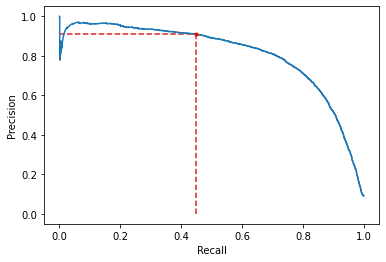

In [107]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.hlines(.91, 0, .45, colors="tab:red", linestyles='--')
plt.vlines(.45, 0, .91, colors="tab:red", linestyles='--')
plt.plot(.45, .91, marker=".", color="r")

In [108]:
threshold_90_precision = thresholds[np.argmax(precisions>.9)]

In [109]:
threshold_90_precision

3370.0194991439594

In [115]:
y_train_pred = (y_scores > threshold_90_precision)

In [119]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision: {precision_score(y_train_5, y_train_pred)}")
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")

Precision: 0.9
Recall: 0.47980077476480354


In [120]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No handles with labels found to put in legend.


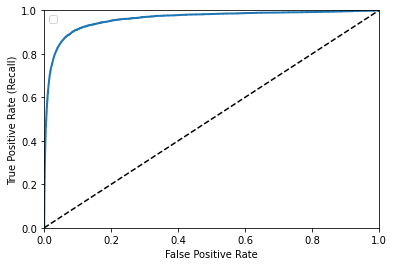

In [138]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()

plot_roc_curve(fpr, tpr)

In [129]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [130]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_clf = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [132]:
y_scores_forest = y_probas_clf[:, 1]

In [133]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

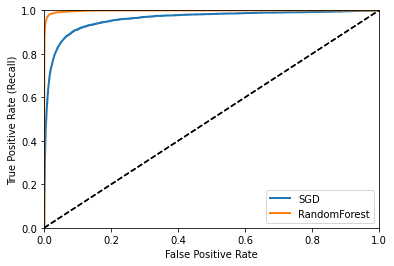

In [139]:
plot_roc_curve(fpr, tpr, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="RandomForest")

### Multiclass Classification

In [143]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [144]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [146]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [147]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [148]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [149]:
sgd_clf.predict([some_digit])

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [154]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mf = confusion_matrix(y_train, y_train_pred)

In [158]:
row_sums = conf_mf.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mf / row_sums

np.fill_diagonal(norm_conf_mx, 0)

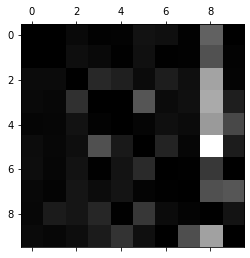

In [159]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)